In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
# Set display options to show all columns
pd.set_option('display.max_columns', None)
from sklearn.calibration import LabelEncoder

df = pd.read_csv('../DataOut/bus_stop_times_feature_added_all_moddedDF.csv')
pivot_df =pd.read_csv('../DataOut/Clusters/TScluster_cluster_percentages.csv')

pivot_df1 = pd.read_csv('../DataOut/Clusters/norm_cluster_cluster_percentages.csv')
pivot_df2 = pd.read_csv('../DataOut/Clusters/TScluster_PCA_cluster_percentages.csv')
pivot_df3 = pd.read_csv('../DataOut/Clusters/TScluster_DTW_cluster_percentages.csv')
pivot_df4 = pd.read_csv('../DataOut/Clusters/TScluster_cluster_percentages.csv')
pivot_df5 =pd.read_csv('../DataOut/Clusters/TScluster_SDTW_cluster_percentages.csv')
pivot_df6 = pd.read_csv('../DataOut/Clusters/Normcluster_new_cluster_percentages.csv')

pivot_dfs=[[pivot_df1,'NormCluster'],[pivot_df2,'TSclusters km pca'],[pivot_df3,'TSclusters withdtw'],[pivot_df4,'TSclusters no dtw'],[pivot_df5,'TScluster_SDTW'],[pivot_df6,'NormCluster_new']]

In [2]:
df

,trip_id,deviceid,direction,bus_stop,date,arrival_time,departure_time,dwell_time,dwell_time_in_seconds_old,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),hour_of_day,day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds
0,4890.0,262,1,101,2021-10-01,06:40:58,06:42:12,0:01:14,74.0,4,6.50,0,0,1,1,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,6,1,10,20.0,0.0,6.1,Partially cloudy,69.0,pro,74.0
1,4890.0,262,1,102,2021-10-01,06:45:42,06:45:42,0:00:00,0.0,4,6.75,0,0,1,1,45.0,45.0,45.0,45.0,45.0,74.0,45.0,45.0,6,1,10,20.0,0.0,6.1,Partially cloudy,210.0,mod,0.0
2,4890.0,262,1,103,2021-10-01,06:53:58,06:54:04,0:00:06,6.0,4,6.75,0,0,1,1,28.0,28.0,28.0,28.0,28.0,0.0,74.0,28.0,6,1,10,20.0,0.0,6.1,Partially cloudy,496.0,mod,6.0
3,4890.0,262,1,104,2021-10-01,06:57:19,06:57:19,0:00:00,0.0,4,6.75,0,0,1,1,1.0,1.0,1.0,1.0,1.0,6.0,0.0,74.0,6,1,10,20.0,0.0,6.1,Partially cloudy,195.0,br,0.0
4,4890.0,262,1,105,2021-10-01,06:58:56,07:02:27,0:03:31,211.0,4,6.75,0,0,1,1,230.0,230.0,230.0,230.0,230.0,0.0,6.0,0.0,6,1,10,20.0,0.0,6.1,Partially cloudy,97.0,pro,211.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90559,11205.0,513,1,110,2022-10-31,18:38:31,18:38:46,0:00:15,15.0,0,18.50,0,0,1,42,18.0,15.0,18.0,38.0,15.0,15.0,15.0,15.0,18,31,10,22.2,0.0,4.3,Partially cloudy,191.0,mod,15.0
90560,11205.0,513,1,111,2022-10-31,18:41:11,18:41:11,0:00:00,0.0,0,18.50,0,0,1,42,7.0,15.0,7.0,12.0,9.0,15.0,15.0,15.0,18,31,10,22.2,0.0,4.3,Partially cloudy,145.0,br,0.0
90561,11205.0,513,1,112,2022-10-31,18:43:37,18:43:44,0:00:07,7.0,0,18.50,0,0,1,42,7.0,12.0,7.0,0.0,2.0,0.0,15.0,15.0,18,31,10,22.2,0.0,4.3,Partially cloudy,146.0,br,7.0
90562,11205.0,513,1,113,2022-10-31,18:46:13,18:46:28,0:00:15,15.0,0,18.75,0,0,1,42,7.0,7.0,7.0,17.0,46.0,7.0,0.0,15.0,18,31,10,22.2,0.0,4.3,Partially cloudy,149.0,mod,15.0


In [3]:
# drop raws after 	'2022-11-01' from df
df = df[df['date']<='2022-11-01']

In [4]:
# show all the columns in pandas dataframes
pd.set_option('display.max_columns', None)

In [5]:
pivot_dfs[4][0]

,deviceid,Cluster_1.0,Cluster_3.0,Cluster_0.0,Cluster_2.0
0,116,55,44,1.0,0.0
1,117,17,41,9.0,33.0
2,121,26,41,15.0,18.0
3,123,27,36,15.0,23.0
4,128,36,29,12.0,23.0
5,209,25,25,0.0,50.0
6,250,26,32,13.0,29.0
7,262,23,39,13.0,24.0


In [6]:
df

,trip_id,deviceid,direction,bus_stop,date,arrival_time,departure_time,dwell_time,dwell_time_in_seconds_old,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),hour_of_day,day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds
0,4890.0,262,1,101,2021-10-01,06:40:58,06:42:12,0:01:14,74.0,4,6.50,0,0,1,1,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,6,1,10,20.0,0.0,6.1,Partially cloudy,69.0,pro,74.0
1,4890.0,262,1,102,2021-10-01,06:45:42,06:45:42,0:00:00,0.0,4,6.75,0,0,1,1,45.0,45.0,45.0,45.0,45.0,74.0,45.0,45.0,6,1,10,20.0,0.0,6.1,Partially cloudy,210.0,mod,0.0
2,4890.0,262,1,103,2021-10-01,06:53:58,06:54:04,0:00:06,6.0,4,6.75,0,0,1,1,28.0,28.0,28.0,28.0,28.0,0.0,74.0,28.0,6,1,10,20.0,0.0,6.1,Partially cloudy,496.0,mod,6.0
3,4890.0,262,1,104,2021-10-01,06:57:19,06:57:19,0:00:00,0.0,4,6.75,0,0,1,1,1.0,1.0,1.0,1.0,1.0,6.0,0.0,74.0,6,1,10,20.0,0.0,6.1,Partially cloudy,195.0,br,0.0
4,4890.0,262,1,105,2021-10-01,06:58:56,07:02:27,0:03:31,211.0,4,6.75,0,0,1,1,230.0,230.0,230.0,230.0,230.0,0.0,6.0,0.0,6,1,10,20.0,0.0,6.1,Partially cloudy,97.0,pro,211.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90559,11205.0,513,1,110,2022-10-31,18:38:31,18:38:46,0:00:15,15.0,0,18.50,0,0,1,42,18.0,15.0,18.0,38.0,15.0,15.0,15.0,15.0,18,31,10,22.2,0.0,4.3,Partially cloudy,191.0,mod,15.0
90560,11205.0,513,1,111,2022-10-31,18:41:11,18:41:11,0:00:00,0.0,0,18.50,0,0,1,42,7.0,15.0,7.0,12.0,9.0,15.0,15.0,15.0,18,31,10,22.2,0.0,4.3,Partially cloudy,145.0,br,0.0
90561,11205.0,513,1,112,2022-10-31,18:43:37,18:43:44,0:00:07,7.0,0,18.50,0,0,1,42,7.0,12.0,7.0,0.0,2.0,0.0,15.0,15.0,18,31,10,22.2,0.0,4.3,Partially cloudy,146.0,br,7.0
90562,11205.0,513,1,113,2022-10-31,18:46:13,18:46:28,0:00:15,15.0,0,18.75,0,0,1,42,7.0,7.0,7.0,17.0,46.0,7.0,0.0,15.0,18,31,10,22.2,0.0,4.3,Partially cloudy,149.0,mod,15.0


In [7]:
selected_deviceid = pivot_df['deviceid'].unique()
selected_deviceid

array([ 116,  117,  121,  123,  128,  209,  250,  262,  264,  274,  275,
        279,  294,  505,  513,  550, 1143, 1166, 1358, 1377, 1408, 1410,
       1718, 1719], dtype=int64)

In [8]:
df = df[df['deviceid'].isin(selected_deviceid)]
df['deviceid'].unique()

array([ 262,  274,  123,  279,  264, 1408,  294,  128,  505,  116,  117,
       1358, 1143,  250,  513, 1377, 1410,  121, 1719, 1718,  275,  209,
        550, 1166], dtype=int64)

In [9]:
df

,trip_id,deviceid,direction,bus_stop,date,arrival_time,departure_time,dwell_time,dwell_time_in_seconds_old,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),hour_of_day,day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds
0,4890.0,262,1,101,2021-10-01,06:40:58,06:42:12,0:01:14,74.0,4,6.50,0,0,1,1,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,6,1,10,20.0,0.0,6.1,Partially cloudy,69.0,pro,74.0
1,4890.0,262,1,102,2021-10-01,06:45:42,06:45:42,0:00:00,0.0,4,6.75,0,0,1,1,45.0,45.0,45.0,45.0,45.0,74.0,45.0,45.0,6,1,10,20.0,0.0,6.1,Partially cloudy,210.0,mod,0.0
2,4890.0,262,1,103,2021-10-01,06:53:58,06:54:04,0:00:06,6.0,4,6.75,0,0,1,1,28.0,28.0,28.0,28.0,28.0,0.0,74.0,28.0,6,1,10,20.0,0.0,6.1,Partially cloudy,496.0,mod,6.0
3,4890.0,262,1,104,2021-10-01,06:57:19,06:57:19,0:00:00,0.0,4,6.75,0,0,1,1,1.0,1.0,1.0,1.0,1.0,6.0,0.0,74.0,6,1,10,20.0,0.0,6.1,Partially cloudy,195.0,br,0.0
4,4890.0,262,1,105,2021-10-01,06:58:56,07:02:27,0:03:31,211.0,4,6.75,0,0,1,1,230.0,230.0,230.0,230.0,230.0,0.0,6.0,0.0,6,1,10,20.0,0.0,6.1,Partially cloudy,97.0,pro,211.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90559,11205.0,513,1,110,2022-10-31,18:38:31,18:38:46,0:00:15,15.0,0,18.50,0,0,1,42,18.0,15.0,18.0,38.0,15.0,15.0,15.0,15.0,18,31,10,22.2,0.0,4.3,Partially cloudy,191.0,mod,15.0
90560,11205.0,513,1,111,2022-10-31,18:41:11,18:41:11,0:00:00,0.0,0,18.50,0,0,1,42,7.0,15.0,7.0,12.0,9.0,15.0,15.0,15.0,18,31,10,22.2,0.0,4.3,Partially cloudy,145.0,br,0.0
90561,11205.0,513,1,112,2022-10-31,18:43:37,18:43:44,0:00:07,7.0,0,18.50,0,0,1,42,7.0,12.0,7.0,0.0,2.0,0.0,15.0,15.0,18,31,10,22.2,0.0,4.3,Partially cloudy,146.0,br,7.0
90562,11205.0,513,1,113,2022-10-31,18:46:13,18:46:28,0:00:15,15.0,0,18.75,0,0,1,42,7.0,7.0,7.0,17.0,46.0,7.0,0.0,15.0,18,31,10,22.2,0.0,4.3,Partially cloudy,149.0,mod,15.0


In [10]:
unique_values_count = df['deviceid'].nunique()
print("Number of unique values:", unique_values_count)

Number of unique values: 24


In [11]:
#get all the column name
df.columns

Index(['trip_id', 'deviceid', 'direction', 'bus_stop', 'date', 'arrival_time',
       'departure_time', 'dwell_time', 'dwell_time_in_seconds_old',
       'day_of_week', 'time_of_day', 'Sunday/holiday', 'saturday',
       'weekday/end', 'week_no', 'dt(w-1)', 'dt(w-2)', 'dt(w-3)', 'dt(t-1)',
       'dt(t-2)', 'dt(n-1)', 'dt(n-2)', 'dt(n-3)', 'hour_of_day', 'day',
       'month', 'temp', 'precip', 'windspeed', 'conditions', 'rt(n-1)',
       'stop_type', 'dwell_time_in_seconds'],
      dtype='object')

In [12]:
def prepare(df):
    # drop a list of columns
    dropList=['departure_time','dwell_time','dwell_time_in_seconds_old','hour_of_day']
    df=df.drop(dropList,axis=1)

    df['date'] = pd.to_datetime(df['date'])
    df['arrival_time'] = pd.to_datetime(df['arrival_time'], format='%H:%M:%S')

    df = df.sort_values(by=['date', 'arrival_time'], ascending=True)

    df.reset_index(drop=True, inplace=True)

    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day

    # Drop the original date column
    df.drop('date', axis=1, inplace=True)

    df['arrival_hour'] = df['arrival_time'].dt.hour
    df['arrival_min'] = df['arrival_time'].dt.minute
    df['arrival_sec'] = df['arrival_time'].dt.second

    # Drop the original date column
    df.drop('arrival_time', axis=1, inplace=True)

    # Columns to label encode
    columns_to_encode = ['stop_type', 'conditions']

    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    # Apply label encoding to selected columns
    for col in columns_to_encode:
        df[col] = label_encoder.fit_transform(df[col])
        
    return df

df=prepare(df)

In [13]:
# # Filter out the DataFrame removing raws of both (month=10 and year=2022)
# df = df[~((df['month']==10) & (df['year']==2022))]
df

,trip_id,deviceid,direction,bus_stop,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds,year,arrival_hour,arrival_min,arrival_sec
0,4890.0,262,1,101,4,6.50,0,0,1,1,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,1,10,20.0,0.0,6.1,2,69.0,2,74.0,2021,6,40,58
1,4890.0,262,1,102,4,6.75,0,0,1,1,45.0,45.0,45.0,45.0,45.0,74.0,45.0,45.0,1,10,20.0,0.0,6.1,2,210.0,1,0.0,2021,6,45,42
2,4890.0,262,1,103,4,6.75,0,0,1,1,28.0,28.0,28.0,28.0,28.0,0.0,74.0,28.0,1,10,20.0,0.0,6.1,2,496.0,1,6.0,2021,6,53,58
3,4890.0,262,1,104,4,6.75,0,0,1,1,1.0,1.0,1.0,1.0,1.0,6.0,0.0,74.0,1,10,20.0,0.0,6.1,2,195.0,0,0.0,2021,6,57,19
4,4890.0,262,1,105,4,6.75,0,0,1,1,230.0,230.0,230.0,230.0,230.0,0.0,6.0,0.0,1,10,20.0,0.0,6.1,2,97.0,2,211.0,2021,6,58,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88581,11205.0,513,1,110,0,18.50,0,0,1,42,18.0,15.0,18.0,38.0,15.0,15.0,15.0,15.0,31,10,22.2,0.0,4.3,2,191.0,1,15.0,2022,18,38,31
88582,11205.0,513,1,111,0,18.50,0,0,1,42,7.0,15.0,7.0,12.0,9.0,15.0,15.0,15.0,31,10,22.2,0.0,4.3,2,145.0,0,0.0,2022,18,41,11
88583,11205.0,513,1,112,0,18.50,0,0,1,42,7.0,12.0,7.0,0.0,2.0,0.0,15.0,15.0,31,10,22.2,0.0,4.3,2,146.0,0,7.0,2022,18,43,37
88584,11205.0,513,1,113,0,18.75,0,0,1,42,7.0,7.0,7.0,17.0,46.0,7.0,0.0,15.0,31,10,22.2,0.0,4.3,2,149.0,1,15.0,2022,18,46,13


# xg boost model

In [18]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_rmse_dict = {}

def train_Model(df):
    # Define features and target
    features = df.drop(['dwell_time_in_seconds'], axis=1)  # Drop the target feature
    target = df['dwell_time_in_seconds']

    # Filter data based on week_no condition
    test_data = df[df['week_no'].isin([39, 40, 41, 42])]
    train_data = df[~df['week_no'].isin([39, 40, 41, 42])]


    # Split train and test data into features and target
    X_train = train_data.drop(columns=['dwell_time_in_seconds']) 
    y_train = train_data['dwell_time_in_seconds']
    X_test = test_data.drop(columns=['dwell_time_in_seconds'])
    y_test = test_data['dwell_time_in_seconds']

    # Initialize XGBoost regressor for Code Block 1
    model = xgb.XGBRegressor(colsample_bytree = 0.7, learning_rate = 0.1,max_depth = 6, alpha = 10, n_estimators = 1000)

    # Train the model on the training data for Code Block 1
    model.fit(X_train, y_train)

    # Make predictions on the testing data for Code Block 1
    predictions = model.predict(X_test)
    
        # Create a copy of the test data and add predicted values for Code Block 2
    predicted_df = test_data.copy()
    predicted_df['predicted_run_time'] = predictions

    # Evaluate the model's performance for Code Block 1
    mae1 = mean_absolute_error(y_test, predictions)
    rmse1 = np.sqrt(mean_squared_error(y_test, predictions))
    mape1 = 0
    
    
    
    
    return model, predictions, predicted_df, mae1, rmse1,mape1

## Using XG boost without clusters

In [19]:
daf_no_clus=df[df['direction'] == 1].copy()

In [20]:
model1,predictions1,predicted_df1,mae1,rmse1,mape1 = train_Model(daf_no_clus)

mae_rmse_dict["without clusters"] = [mae1, rmse1,mape1,model1]

mae_rmse_dict["skip 1"] = " "

print(f'Mean Absolute Error without cluster: {mae1}')
print(f'Root Mean Square Error  without cluster: {rmse1}')
print(f'Mean Absolute Percentage Error without cluster: {mape1}')


Mean Absolute Error without cluster: 13.554800748539469
Root Mean Square Error  without cluster: 27.35024354534326
Mean Absolute Percentage Error without cluster: 0


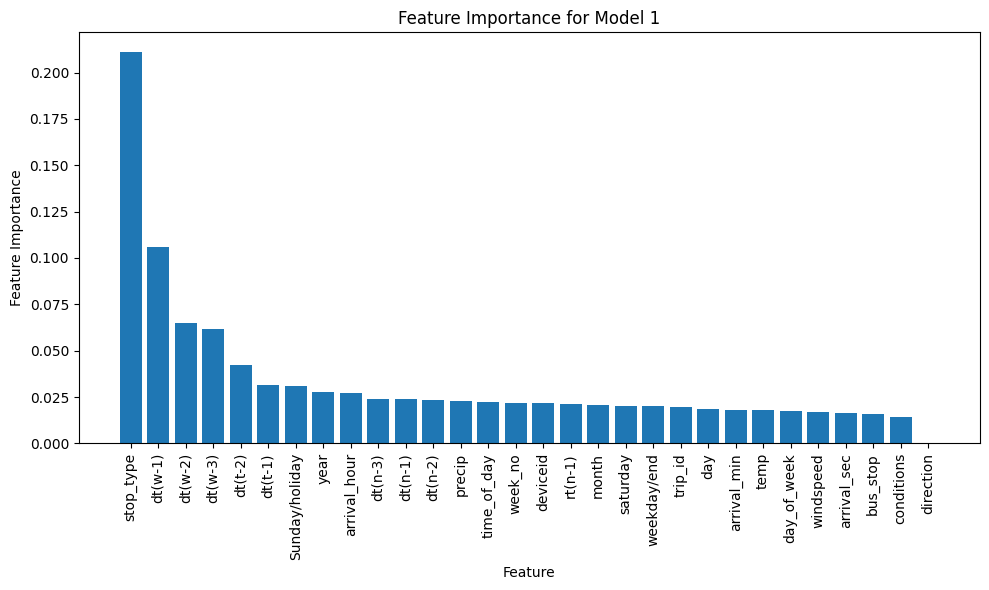

In [21]:
import matplotlib.pyplot as plt

features1 = df.drop(['dwell_time_in_seconds'], axis=1)  # Drop the target feature

# Get feature importances for Model 1
feature_importance1 = model1.feature_importances_

# Get the names of the features
feature_names1 = features1.columns

# Sort feature importances and feature names in descending order
sorted_idx1 = feature_importance1.argsort()[::-1]
feature_importance1 = feature_importance1[sorted_idx1]
feature_names1 = feature_names1[sorted_idx1]

# Create a bar graph for Model 1
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance1)), feature_importance1, align='center')
plt.xticks(range(len(feature_importance1)), feature_names1, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Model 1')
plt.tight_layout()
plt.show()


## Using XG boost with clusters

In [22]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# models dictionary
models = {}

# Loop for Code Block 2
for df_tup in pivot_dfs:
    daf_with_clus = df[df['direction'] == 1].copy()
    pivot_df = df_tup[0]
    cluster_method = df_tup[1]
    
    # Merge the dataframes using the device_id column
    new_df = pd.merge(daf_with_clus, pivot_df, on='deviceid', how='inner')
    new_df = new_df[new_df['direction'] == 1]
    
    # Define features and target
    features2 = new_df.drop(['dwell_time_in_seconds'], axis=1)  # Drop the target feature
    target2 = new_df['dwell_time_in_seconds']
    
    model2,predictions2,predicted_df2,mae2,rmse2,mape2 = train_Model(new_df)
    
    models[cluster_method] = model2
    
    mae_rmse_dict[f"{cluster_method} with clusters"] = [mae2, rmse2,mape2,model2]
    
    print(f'Mean Absolute Error {cluster_method} : {mae2}')
    print(f'Root Mean Square Error {cluster_method} : {rmse2}')
    print(f'Mean Absolute Percentage Error {cluster_method} : {mape2}')
    print(" ")
    
mae_rmse_dict["skip 2"] = " "


Mean Absolute Error NormCluster : 13.583611267063445
Root Mean Square Error NormCluster : 27.244942409428138
Mean Absolute Percentage Error NormCluster : 0
 
Mean Absolute Error TSclusters km pca : 13.712391278140355
Root Mean Square Error TSclusters km pca : 27.494606211271364
Mean Absolute Percentage Error TSclusters km pca : 0
 
Mean Absolute Error TSclusters withdtw : 14.090564332030324
Root Mean Square Error TSclusters withdtw : 28.487563224866832
Mean Absolute Percentage Error TSclusters withdtw : 0
 
Mean Absolute Error TSclusters no dtw : 13.476142814978719
Root Mean Square Error TSclusters no dtw : 27.419471038173086
Mean Absolute Percentage Error TSclusters no dtw : 0
 
Mean Absolute Error TScluster_SDTW : 13.840862912932844
Root Mean Square Error TScluster_SDTW : 27.922027266665946
Mean Absolute Percentage Error TScluster_SDTW : 0
 
Mean Absolute Error NormCluster_new : 13.863186761962423
Root Mean Square Error NormCluster_new : 27.990178738087085
Mean Absolute Percentage Er

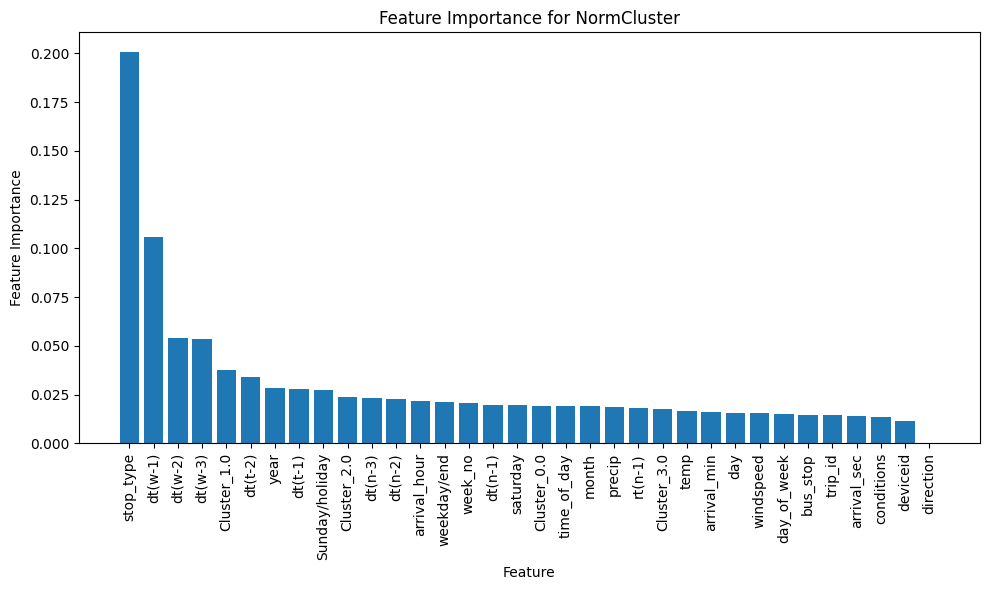

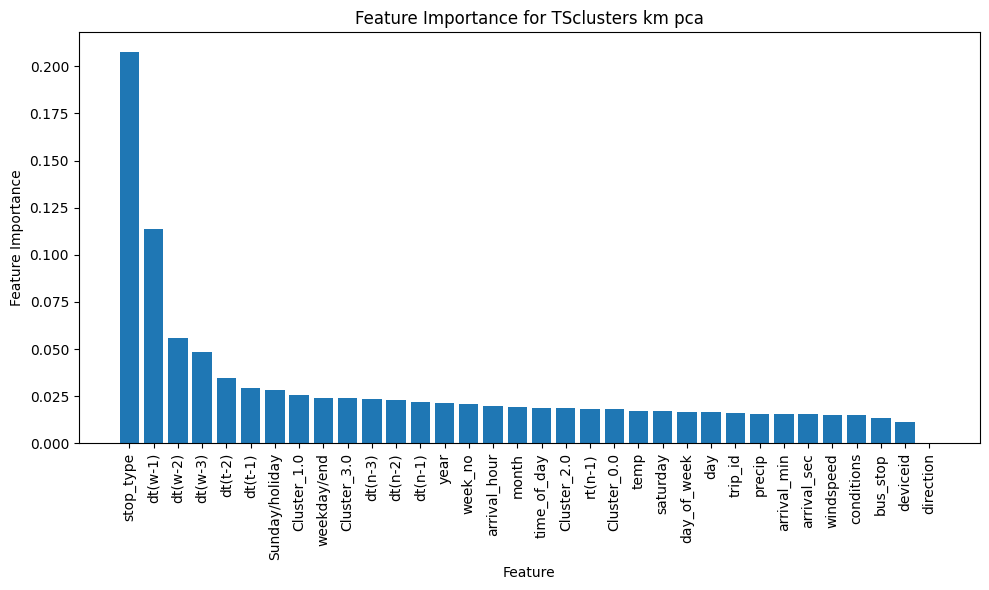

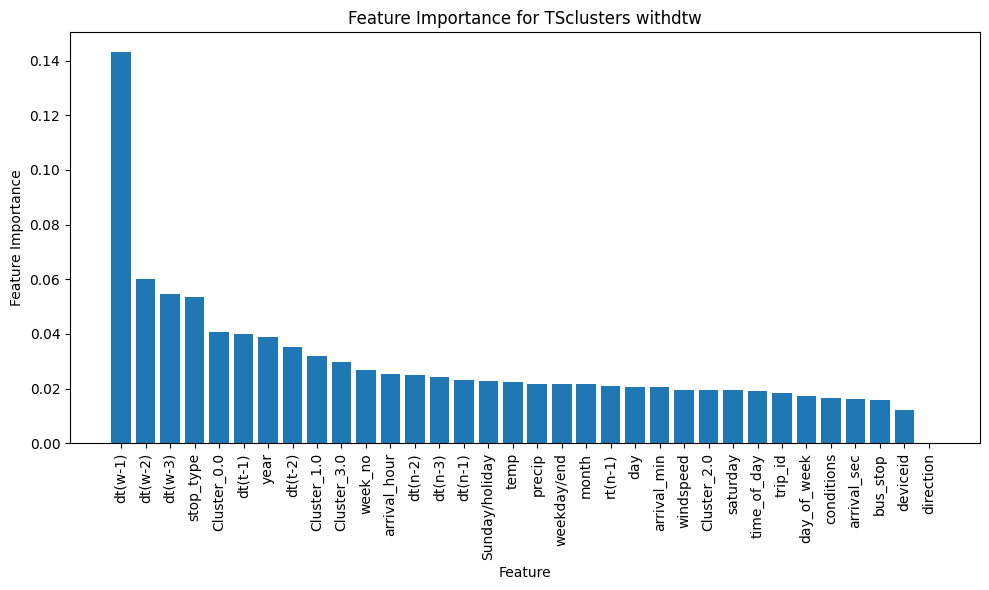

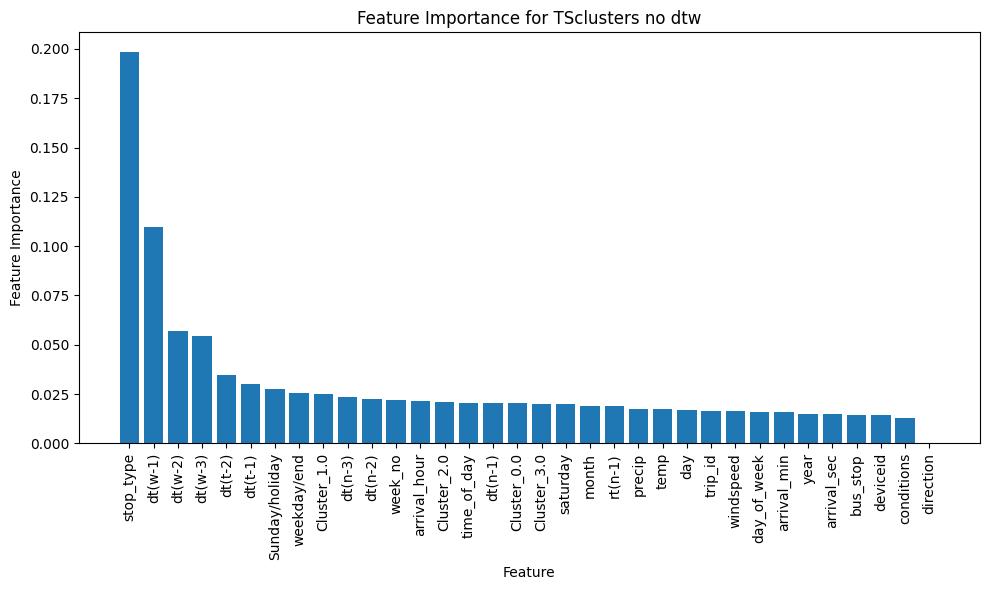

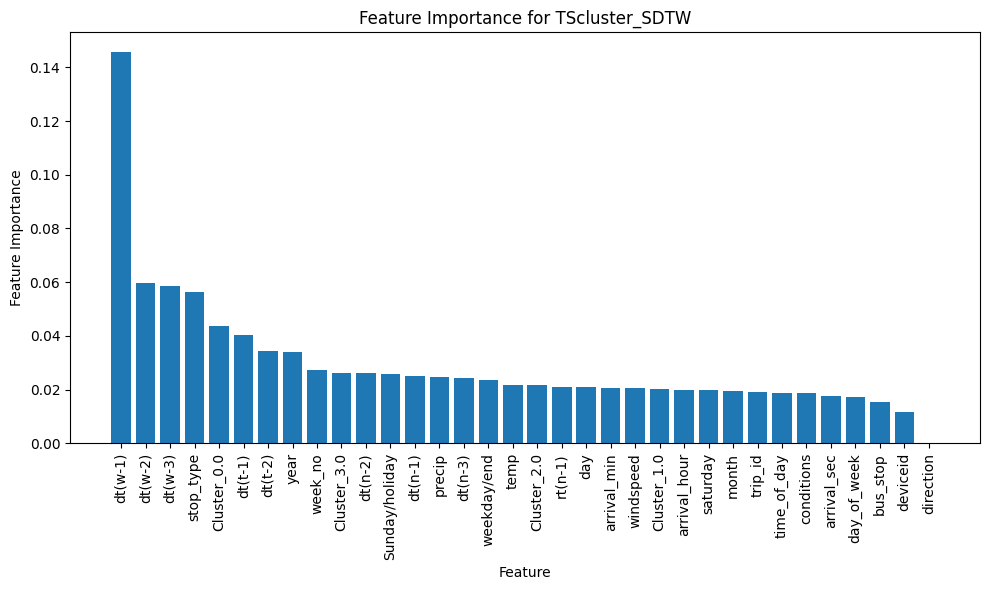

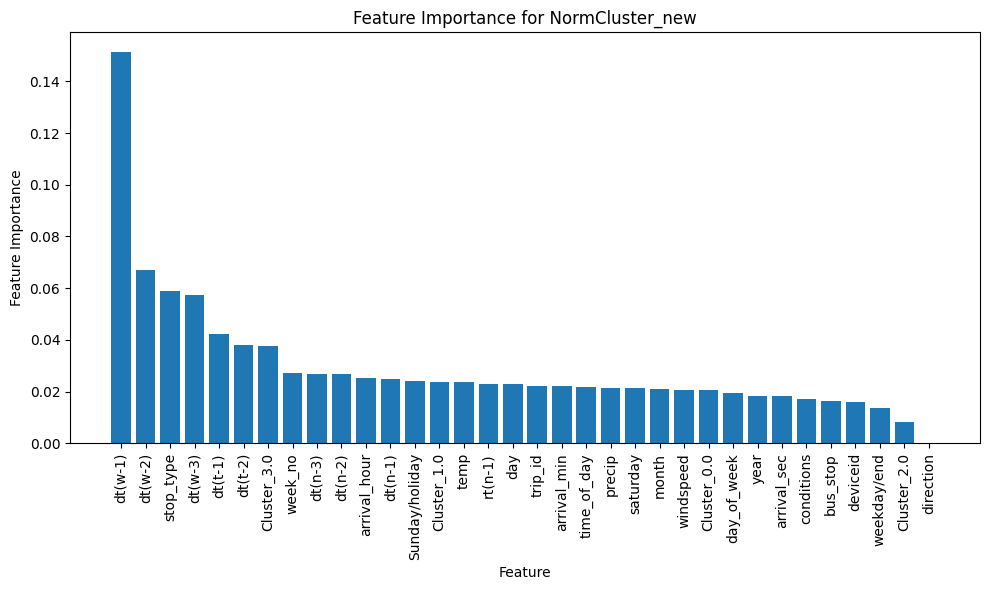

In [23]:
import matplotlib.pyplot as plt

for modelname, model in models.items():
    # Get feature importances for Model 2
    feature_importance2 = model.feature_importances_

    # Get the names of the features
    feature_names2 = features2.columns

    # Sort feature importances and feature names in descending order
    sorted_idx2 = feature_importance2.argsort()[::-1]
    feature_importance2 = feature_importance2[sorted_idx2]
    feature_names2 = feature_names2[sorted_idx2]

    # Create a bar graph for Model 2
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importance2)), feature_importance2, align='center')
    plt.xticks(range(len(feature_importance2)), feature_names2, rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Feature Importance')
    plt.title(f'Feature Importance for {modelname}')
    plt.tight_layout()
    plt.show()


## Using XG boost with clusters + features


In [24]:
df

,trip_id,deviceid,direction,bus_stop,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds,year,arrival_hour,arrival_min,arrival_sec
0,4890.0,262,1,101,4,6.50,0,0,1,1,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,1,10,20.0,0.0,6.1,2,69.0,2,74.0,2021,6,40,58
1,4890.0,262,1,102,4,6.75,0,0,1,1,45.0,45.0,45.0,45.0,45.0,74.0,45.0,45.0,1,10,20.0,0.0,6.1,2,210.0,1,0.0,2021,6,45,42
2,4890.0,262,1,103,4,6.75,0,0,1,1,28.0,28.0,28.0,28.0,28.0,0.0,74.0,28.0,1,10,20.0,0.0,6.1,2,496.0,1,6.0,2021,6,53,58
3,4890.0,262,1,104,4,6.75,0,0,1,1,1.0,1.0,1.0,1.0,1.0,6.0,0.0,74.0,1,10,20.0,0.0,6.1,2,195.0,0,0.0,2021,6,57,19
4,4890.0,262,1,105,4,6.75,0,0,1,1,230.0,230.0,230.0,230.0,230.0,0.0,6.0,0.0,1,10,20.0,0.0,6.1,2,97.0,2,211.0,2021,6,58,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88581,11205.0,513,1,110,0,18.50,0,0,1,42,18.0,15.0,18.0,38.0,15.0,15.0,15.0,15.0,31,10,22.2,0.0,4.3,2,191.0,1,15.0,2022,18,38,31
88582,11205.0,513,1,111,0,18.50,0,0,1,42,7.0,15.0,7.0,12.0,9.0,15.0,15.0,15.0,31,10,22.2,0.0,4.3,2,145.0,0,0.0,2022,18,41,11
88583,11205.0,513,1,112,0,18.50,0,0,1,42,7.0,12.0,7.0,0.0,2.0,0.0,15.0,15.0,31,10,22.2,0.0,4.3,2,146.0,0,7.0,2022,18,43,37
88584,11205.0,513,1,113,0,18.75,0,0,1,42,7.0,7.0,7.0,17.0,46.0,7.0,0.0,15.0,31,10,22.2,0.0,4.3,2,149.0,1,15.0,2022,18,46,13


In [26]:
# load csv '../DataOut/means_and_maxima_minima_counts.csv'
means_and_maxima_minima_counts = pd.read_csv('../DataOut/means_and_maxima_minima_counts.csv')
daf_with_features = df[df['direction'] == 1].copy()
# drop deviceid_x and deviceid_y columns from means_and_maxima_minima_counts
means_and_maxima_minima_counts.drop(['deviceid_x', 'deviceid_y'], axis=1, inplace=True)

# open csv avg_for_devID_time_of_day_and_segment.csv
avg_for_devID_time_of_day_and_segment = pd.read_csv('../DataOut/avg_for_devID_time_of_day_and_segment.csv')
# rename avg_for_devID_time_of_day_and_segment time_of_day column to dayparts
avg_for_devID_time_of_day_and_segment.rename(columns={'time_of_day': 'dayparts'}, inplace=True)

# Create a new 'time_of_day' column based on the time component
daf_with_features['dayparts'] = pd.cut(
    daf_with_features['arrival_hour'],
    bins=[0, 6, 19, 24],
    labels=['morning', 'day', 'night'],
    include_lowest=True
)

# add data from avg_for_devID_time_of_day_and_segment to daf_with_features based on deviceid and dayparts
daf_with_features = pd.merge(daf_with_features, avg_for_devID_time_of_day_and_segment, on=['deviceid', 'dayparts','segment'], how='left')



KeyError: 'segment'

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# models dictionary
models2 = {}

# Loop for Code Block 4
for df_tup in pivot_dfs:
    new_df_block4= pd.DataFrame()
    daf_with_clus_block4 = daf_with_features.copy()
    pivot_df_block4 = df_tup[0]
    cluster_method_block4 = df_tup[1]
    
    # Merge the dataframes using the device_id column for Code Block 4
    new_df_block4 = pd.merge(daf_with_clus_block4, pivot_df_block4, on='deviceid', how='inner')
    new_df_block4 = new_df_block4[new_df_block4['direction'] == 1]
    
    # Define features and target
    features3 = daf_with_features.drop(['dwell_time_in_seconds'], axis=1)  # Drop the target feature
    target3 = daf_with_features['dwell_time_in_seconds']
    
    model_block4,predictions_block4,predicted_df_block4,mae_block4,rmse_block4 ,mape4= train_Model(new_df_block4)
    
    models2[cluster_method_block4] = model_block4
    
    mae_rmse_dict[f"new features & {cluster_method_block4}"] = [mae_block4, rmse_block4,mape4,model_block4]
    
    print(f'Mean Absolute Error {cluster_method_block4} : {mae_block4}')
    print(f'Root Mean Square Error {cluster_method_block4} : {rmse_block4}')
    print(f'Mean Absolute Percentage Error {cluster_method_block4} : {mape4}')
mae_rmse_dict["skip 4"] = " "



In [ ]:
import matplotlib.pyplot as plt

for modelname, model in models2.items():
    # Get feature importances for Model 2
    feature_importance2 = model.feature_importances_

    # Get the names of the features
    feature_names2 = features3.columns

    # Sort feature importances and feature names in descending order
    sorted_idx2 = feature_importance2.argsort()[::-1]
    feature_importance2 = feature_importance2[sorted_idx2]
    feature_names2 = feature_names2[sorted_idx2]

    # Create a bar graph for Model 2
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importance2)), feature_importance2, align='center')
    plt.xticks(range(len(feature_importance2)), feature_names2, rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Feature Importance')
    plt.title(f'Feature Importance for {modelname}')
    plt.tight_layout()
    plt.show()


# summery

In [27]:
# print mae and rmse for all models and get the best model
best_model = None
best_mae = None
best_rmse = None
for key, value in mae_rmse_dict.items():
    if key == "skip 1" or key == "skip 2" or key == "skip 3" or key == "skip 4" or key == "skip_5": 
        print(" ")
    else:
        print(f"{key} : MAE: {value[0]}, RMSE: {value[1]} , MAPE: {value[2]}")
        if best_model == None:
            best_model = key
            best_mae = value[0]
            best_rmse = value[1]
            best_mape = value[2]
        else:
            if value[0] < best_mae:
                best_model_name = key
                best_mae = value[0]
                best_rmse = value[1]
                best_mape = value[2]
                best_model= value[3]
                
print(" ")
print(f"Best model : {best_model_name} , MAE: {best_mae}, RMSE: {best_rmse} , MAPE: {best_mape}")
    
    

without clusters : MAE: 13.554800748539469, RMSE: 27.35024354534326 , MAPE: 0
 
NormCluster with clusters : MAE: 13.583611267063445, RMSE: 27.244942409428138 , MAPE: 0
TSclusters km pca with clusters : MAE: 13.712391278140355, RMSE: 27.494606211271364 , MAPE: 0
TSclusters withdtw with clusters : MAE: 14.090564332030324, RMSE: 28.487563224866832 , MAPE: 0
TSclusters no dtw with clusters : MAE: 13.476142814978719, RMSE: 27.419471038173086 , MAPE: 0
TScluster_SDTW with clusters : MAE: 13.840862912932844, RMSE: 27.922027266665946 , MAPE: 0
NormCluster_new with clusters : MAE: 13.863186761962423, RMSE: 27.990178738087085 , MAPE: 0
 
 
Best model : TSclusters no dtw with clusters , MAE: 13.476142814978719, RMSE: 27.419471038173086 , MAPE: 0


In [ ]:
# draw the difference between MAE,RMSE and MAPE for best model vs the without clusters model on a side by side bar chart
import matplotlib.pyplot as plt
import numpy as np

# set width of bar

barWidth = 0.25

# set height of bar

bars1 = [mae_rmse_dict["without clusters"][0],mae_rmse_dict["without clusters"][1],mae_rmse_dict["without clusters"][2]]
bars2 = [mae_rmse_dict[best_model_name][0],mae_rmse_dict[best_model_name][1],mae_rmse_dict[best_model_name][2]]

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]


# Make the plot
plt.figure(figsize=(10, 6))
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='without clusters')
plt.bar(r2, bars2, color='red', width=barWidth, edgecolor='white', label=best_model_name)

# Add xticks on the middle of the group bars
plt.xlabel('Evaluation Metric', fontweight='bold')
plt.ylabel('Value', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['MAE', 'RMSE', 'MAPE'])

# Create legend & Show graphic
plt.legend()
plt.show()




In [ ]:
# draw the difference between MAE,RMSE and MAPE for best model vs the without clusters model on a multi bar graph with the 3 values for the difference of each error metric for each model.

# get the difference between MAE,RMSE and MAPE for best model vs the without clusters model
mae_diff = mae_rmse_dict['without clusters'][0] - mae_rmse_dict[best_model_name][0]
rmse_diff = mae_rmse_dict['without clusters'][1] - mae_rmse_dict[best_model_name][1]
mape_diff = mae_rmse_dict['without clusters'][2] - mae_rmse_dict[best_model_name][2]

# create a dataframe with the difference between MAE,RMSE and MAPE for best model vs the without clusters model
diff_df = pd.DataFrame({'Error Metric': ['MAE', 'RMSE', 'MAPE'],
                        'Difference': [mae_diff, rmse_diff, mape_diff]})
diff_df

# Create a bar graph for the difference between MAE,RMSE and MAPE for best model vs the without clusters model
plt.figure(figsize=(10, 6))
plt.bar(diff_df['Error Metric'], diff_df['Difference'], align='center',color='orange')
plt.xlabel('Error Metric')
plt.ylabel('Difference')
plt.title('Difference between Error Metrics for Best Model vs Without Clusters Model')
plt.tight_layout()
plt.show()
